In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [29]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

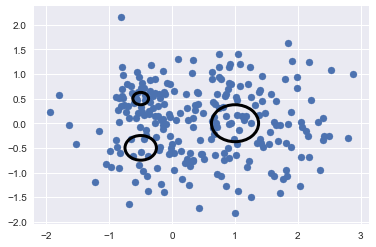

In [30]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [31]:
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [32]:
initialize_centroids(points, 3)

array([[-0.81071714,  2.15366101],
       [-0.72189295,  0.79699669],
       [ 1.83636941,  1.62411936]])

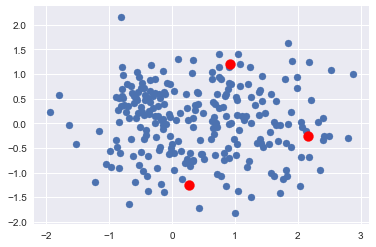

In [33]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [34]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [35]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [36]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [37]:
move_centroids(points, closest_centroid(points, c), c)

array([[ 1.3411966 , -0.43675791],
       [ 1.10202815,  0.81087451],
       [-0.39475423,  0.01193258]])

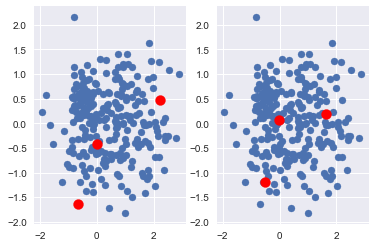

In [38]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)